In [5]:
import json
import traceback
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [55]:
filep = open("/Users/apple/Desktop/car-resale/cars24_new.jsonl", encoding = "utf")
# filew = open("/Users/apple/Desktop/car-resale/cars23_new.json", 'w', encoding= "utf")

In [56]:
cars_list = []
for line in filep:
    temp_dict = {}
    data = json.loads(line)

    make = data.get("make")
    model = data.get("model")
    year = data.get("year")
    price = data.get("listingPrice")
    fuel = data.get("fuelType")
    body = data.get("bodyType")
    transmission = data.get("transmission")
    temp_dict = next((d for d in data.get("overview") if d['key'] == 'engineCapacity'), None)
    if temp_dict is None:
        capacity = "1000 cc"
    else:
        capacity = temp_dict.get("value")
    distance = data.get("odometerReading")
    city = data.get("city")
    owners = data.get("ownerNumber")
    
    data2 = data.get("specsAndFeatures").get("all")
    temp_dict = next((d for d in data2 if d['key'] == 'Cylinders'), None)
    if temp_dict is None:
        cylinders = 3
    else:
        cylinders = temp_dict.get("value")
    temp_dict = next((d for d in data2 if d['key'] == 'GroundClearancemm'), None)
    if temp_dict is None:
        clearance = 170
    else:
        clearance = temp_dict.get("value")
    temp_dict = next((d for d in data2 if d['key'] == 'SeatingCapacity'), None)
    if temp_dict is None:
        seating = 5
    else:
        seating = temp_dict.get("value")
    temp_dict = next((d for d in data2 if d['key'] == 'FueltankCapacitylitres'), None)
    if temp_dict is None:
        fuel_tank = 30
    else:
        fuel_tank = temp_dict.get("value")
    temp_dict = next((d for d in data2 if d['key'] == 'MaxPowerbhp'), None)
    if temp_dict is None:
        bhp = 70
    else:
        bhp = temp_dict.get("value")
    temp_dict = next((d for d in data2 if d['key'] == 'MaxPowerrpm'), None)
    if temp_dict is None:
        rpm = 5000
    else:
        rpm = temp_dict.get("value")
    
    
    obj = {}
    obj["car_make"] = make
    obj["car_model"] = model
    obj["car_year"] = 2023 - int(year)
    obj["fair_price"] = price
    obj["fuel_type"] = fuel
    obj["body_type"] = body
    obj["transmission"] = transmission
    obj["engine_cap"] = int(capacity[:-3])
    obj["distance_driven"] = distance
    obj["cylinders"] = int(cylinders)
    obj["ground_clearance"] = int(clearance)
    obj["seating_cap"] = int(seating)
    obj["fuel_tank_cap"] = float(fuel_tank)
    obj["maxpower_bhp"] = float(bhp)
    obj["maxpower_rpm"] = float(rpm)
    obj["city"] = city
    obj["num_owners"] = owners
    
    
    cars_list.append(obj)
df = pd.DataFrame(cars_list)
print(df)

       car_make    car_model  car_year  fair_price fuel_type  body_type  \
0        Maruti  Wagon R 1.0         8      366000    Petrol  Hatchback   
1        Toyota   Etios Liva         7      429000    Petrol  Hatchback   
2       Hyundai    Grand i10         8      422000    Petrol  Hatchback   
3        Maruti  New Wagon-R         3      509000    Petrol  Hatchback   
4          Tata        TIGOR         6      474000    Petrol      Sedan   
...         ...          ...       ...         ...       ...        ...   
12422  Mahindra      XUV 3OO         1     1358000    Petrol        SUV   
12423      Tata       ALTROZ         3      694000    Petrol  Hatchback   
12424     Honda         City         7      774000    Petrol      Sedan   
12425    Maruti      Celerio         3      584000    Petrol  Hatchback   
12426      Tata         Bolt         7      367000    Petrol  Hatchback   

      transmission  engine_cap  distance_driven  cylinders  ground_clearance  \
0        Automatic 

In [57]:
column_types = df.dtypes

print(column_types)

car_make             object
car_model            object
car_year              int64
fair_price            int64
fuel_type            object
body_type            object
transmission         object
engine_cap            int64
distance_driven       int64
cylinders             int64
ground_clearance      int64
seating_cap           int64
fuel_tank_cap       float64
maxpower_bhp        float64
maxpower_rpm        float64
city                 object
num_owners            int64
dtype: object


In [58]:
# df['car_year'] = pd.to_numeric(df['car_year'])
df['seating_cap'].unique()

array([5, 7, 8, 6, 4, 9])

In [59]:
df['fuel_type'].unique()

array(['Petrol', 'CNG', 'Diesel', 'LPG'], dtype=object)

In [60]:
df['city'].unique()

array(['Noida', 'Pune', 'New Delhi', 'Lucknow', 'Kochi', 'Ghaziabad',
       'Chennai', 'Nashik', 'Gurgaon', 'Mumbai', 'Hyderabad', 'Bangalore',
       'Kolkata', 'Ludhiana', 'Ahmedabad', 'Chandigarh', 'Jaipur',
       'Faridabad', 'Nagpur', 'Coimbatore', 'Indore', 'Patna', 'Surat',
       'Rajkot', 'Vadodara', 'Rohtak'], dtype=object)

<AxesSubplot:xlabel='car_year', ylabel='fair_price'>

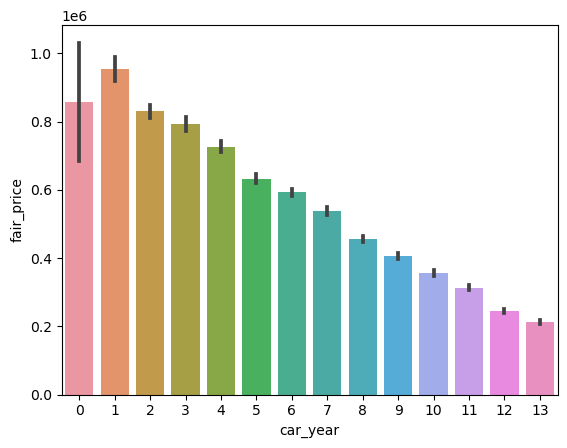

In [61]:
import seaborn as sns
sns.barplot(x = "car_year", y = "fair_price", data = df)

<AxesSubplot:xlabel='seating_cap', ylabel='fair_price'>

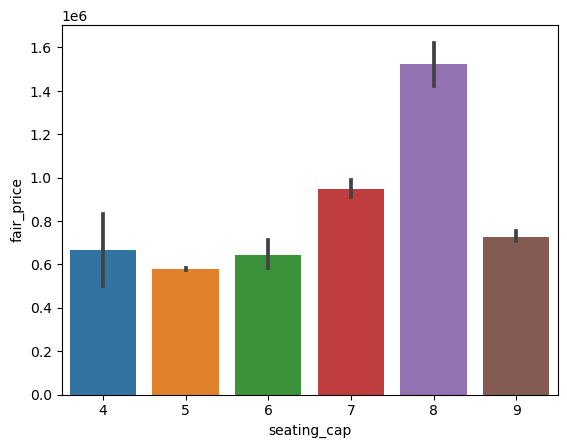

In [63]:
sns.barplot(x = "seating_cap", y = "fair_price", data = df)

In [64]:
print(df.duplicated().sum())

df = df.drop_duplicates()
df.shape

4399


(8028, 17)

In [65]:
# df['car_year'] = np.nan_to_num(np.log(df['car_year']), neginf=0)
df['fair_price'] = np.nan_to_num(np.log(df['fair_price']), neginf=0)
# df['num_owners'] = np.nan_to_num(np.log(df['num_owners']), neginf=0)
# df['engine_cap'] = np.nan_to_num(np.log(df['engine_cap']), neginf=0)
df['distance_driven'] = np.nan_to_num(np.log(df['distance_driven']), neginf=0)
# df['cylinders'] = np.nan_to_num(np.log(df['cylinders']), neginf=0)
# df['ground_clearance'] = np.nan_to_num(np.log(df['ground_clearance']), neginf=0)
# df['seating_cap'] = np.nan_to_num(np.log(df['seating_cap']), neginf=0)
# df['fuel_tank_cap'] = np.nan_to_num(np.log(df['fuel_tank_cap']), neginf=0)
# df['maxpower_bhp'] = np.nan_to_num(np.log(df['maxpower_bhp']), neginf=0)
df['maxpower_rpm'] = np.nan_to_num(np.log(df['maxpower_rpm']), neginf=0)

In [66]:
df_model = df.copy()
df_model = pd.get_dummies(data = df_model, drop_first=True)

df_model.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_model.columns.values]

print(df_model.head())

   car_year  fair_price  engine_cap  distance_driven  cylinders  \
0         8   12.810389         998        10.891392          3   
1         7   12.969212        1000        10.507503          3   
2         8   12.952761        1197        11.374272          4   
3         3   13.140203         998        10.624274          3   
4         6   13.068963        1199        11.428902          3   

   ground_clearance  seating_cap  fuel_tank_cap  maxpower_bhp  maxpower_rpm  \
0               165            5           35.0          67.0      8.732305   
1               170            5           30.0          70.0      8.517193   
2               165            5           43.0          79.0      8.699515   
3               170            5           32.0          67.0      8.612503   
4               170            5           35.0          84.0      8.699515   

   ...  city_Nagpur  city_Nashik  city_New Delhi  city_Noida  city_Patna  \
0  ...            0            0              

In [67]:
X = df_model.copy()
X.drop(['fair_price'], axis=1, inplace=True)
y = df_model['fair_price']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (6422, 181)
X test:  (1606, 181)
y train:  (6422,)
y test:  (1606,)


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont  = ["car_year","num_owners","engine_cap","distance_driven","cylinders","ground_clearance","seating_cap","fuel_tank_cap","maxpower_bhp","maxpower_rpm"]
X_train[cont] = scaler.fit_transform(X_train[cont])
X_test[cont] = scaler.transform(X_test[cont])

In [70]:
X_train.head()

,car_year,engine_cap,distance_driven,cylinders,ground_clearance,seating_cap,fuel_tank_cap,maxpower_bhp,maxpower_rpm,num_owners,...,city_Nagpur,city_Nashik,city_New Delhi,city_Noida,city_Patna,city_Pune,city_Rajkot,city_Rohtak,city_Surat,city_Vadodara
5639,2.044372,-0.776735,0.085515,-1.192299,-0.160576,-0.161853,-1.161021,-0.618007,-0.668663,-0.608202,...,0,0,0,0,0,0,0,0,0,0
1908,-0.383063,-0.781089,0.740134,-1.192299,0.740368,-0.161853,-1.410191,-0.765499,-0.025342,1.300827,...,0,0,0,0,0,0,0,0,0,0
3915,-0.383063,1.391784,0.552155,0.835494,-0.611049,-0.161853,-0.538098,0.807750,-2.885990,-0.608202,...,0,0,0,0,1,0,0,0,0,0
3347,-0.036287,0.081093,-1.816866,0.835494,-0.611049,-0.161853,0.458579,-0.077203,0.561965,-0.608202,...,0,0,0,0,0,1,0,0,0,0
142,0.310490,0.081093,0.260293,0.835494,-0.160576,-0.161853,0.707748,-0.028038,0.561965,-0.608202,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
r2_train_scores = []
r2_test_scores = []
cv_mean = []

def evaluate_model(model):
    model.fit(X_train, y_train)

    #R2 score of training set
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(round(r2_train,2))

    #R2 score of test set
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(round(r2_test,2))

    # CV score of training set
    cv_training = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))

    # Printing each score
    print("Training set R2 scores: ",round(r2_train,2))
    print("Test set R2 scores: ",round(r2_test,2))
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ",round(cv_mean_training,2))


    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    plt.show()

Training set R2 scores:  0.95
Test set R2 scores:  -4.850200832983036e+17
Training cross validation score:  [-1.04566735e+18 -1.28898847e+18 -5.79263753e+17 -1.55551542e+18
 -2.98020281e+19]
Training cross validation mean score:  -6.854292612296109e+18


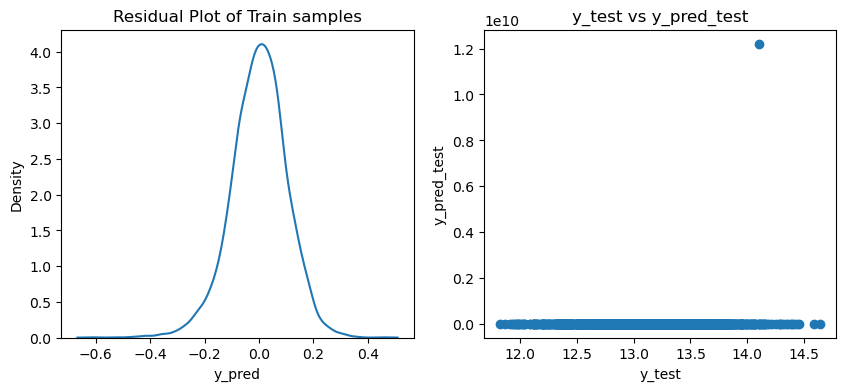

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
evaluate_model(lr)

Training set R2 scores:  0.95
Test set R2 scores:  0.94
Training cross validation score:  [0.94123347 0.93839978 0.9387306  0.94333171 0.94016399]
Training cross validation mean score:  0.94


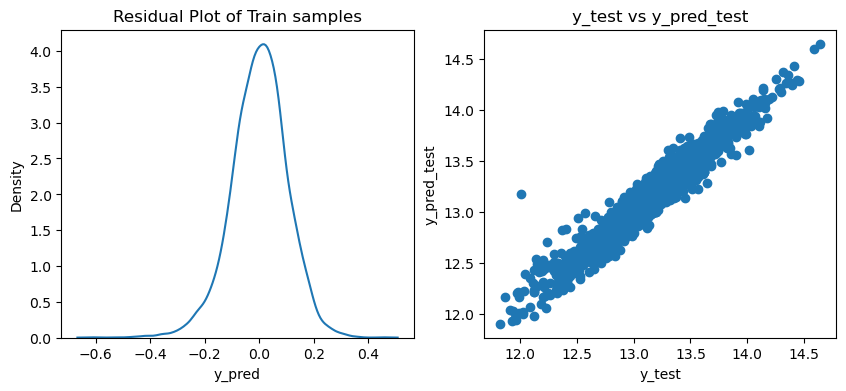

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)

ridge_reg = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))
evaluate_model(ridge_reg)

Training set R2 scores:  0.9
Test set R2 scores:  0.89
Training cross validation score:  [0.89712065 0.89395229 0.89297494 0.89644036 0.89926432]
Training cross validation mean score:  0.9


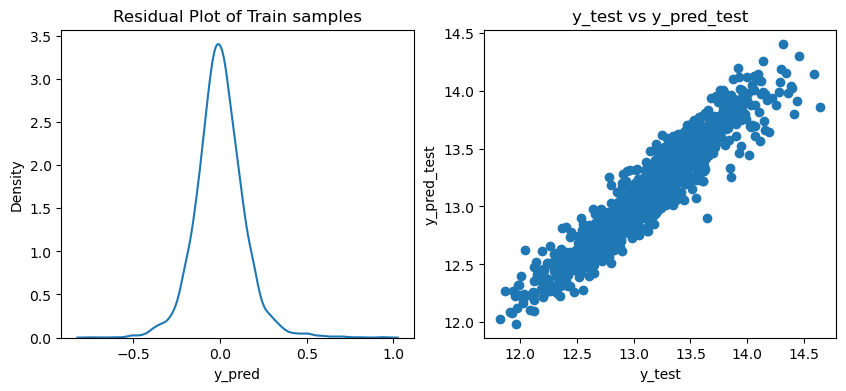

In [74]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14)

lasso_reg = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))
evaluate_model(lasso_reg)

Training set R2 scores:  0.91
Test set R2 scores:  0.9
Training cross validation score:  [0.90748123 0.90642601 0.90345162 0.90643348 0.90077659]
Training cross validation mean score:  0.9


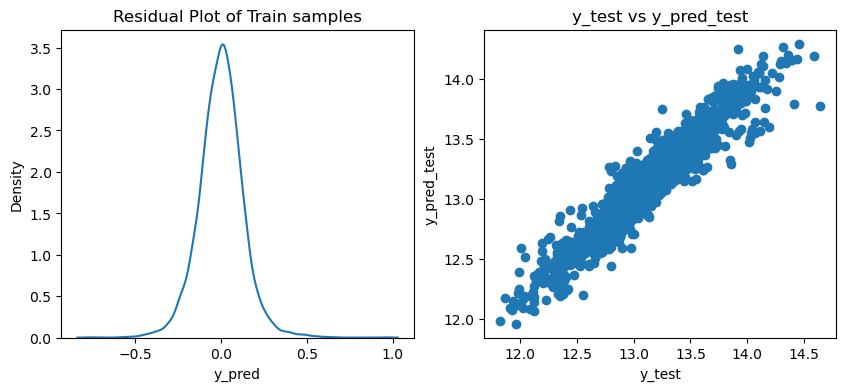

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xg = XGBRegressor(verbosity= 0)

n_estimators = [200, 200]
max_depth = [2, 2]
booster=['gbtree','gblinear']
learning_rate=[0.1,0.1]
min_child_weight=[2,2]
base_score=[0.5,0.5]

parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xg_reg = RandomizedSearchCV(estimator=xg, param_distributions=parameter_grid)
evaluate_model(xg_reg)